In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2

In [2]:
print(tf.__version__)

2.3.0


In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [4]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib
from skimage.filters import laplace
from skimage import io

In [5]:
# C:\Users\patel\Desktop\Mini_Project\dMini_Projectataset\individual\elbow
training_dir = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/shoulder/train/"
# testing_dir  = "C:/Users/patel/Desktop/Mini_Project/dataset/individual/elbow/validation/"

print("DATA IMPORTING FROM THE DIRECTORY...")
training_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split=0.2,
#     rescale = 1./255,
#     horizontal_flip = True,
#     vertical_flip = True,
    rotation_range = 15,
    fill_mode = 'nearest'
)


training_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle=True,
    class_mode = 'categorical',
    batch_size = 32,
    subset= 'training'
)

validation_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (256,256),
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 16,
    subset = 'validation'
)
print("DATA LOADED")

DATA IMPORTING FROM THE DIRECTORY...
Found 6704 images belonging to 2 classes.
Found 1675 images belonging to 2 classes.
DATA LOADED


In [6]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, MaxPooling2D, Conv2D,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# #Trial 1

# model = Sequential([
#     Conv2D(64, 7, activation='relu',padding='same',input_shape=[224,224,3]),
#     MaxPooling2D(2),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     Conv2D(128,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     Conv2D(256,3,padding = 'same',activation='relu'),
#     MaxPooling2D(2),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dropout(0.3),
#     Dense(64,activation='relu'),
#     Dropout(0.25),
#     Dense(2,activation='softmax')
# ])

In [8]:
#trial - 2 - EffNetB0
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    input_shape=(256,256,3),
    include_top = False,
    weights = 'imagenet'
)

for layer in base_model.layers[:-22]:
    layer.trainable = False

x = Flatten()(base_model.output)


x = Dropout(0.3)(x)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.25)(x)
x = Dense(16,activation = 'relu')(x)
x = Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(base_model.input, x)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

block6c_project_bn (BatchNormal (None, 8, 8, 192)    768         block6c_project_conv[0][0]       
__________________________________________________________________________________________________
block6c_drop (Dropout)          (None, 8, 8, 192)    0           block6c_project_bn[0][0]         
__________________________________________________________________________________________________
block6c_add (Add)               (None, 8, 8, 192)    0           block6c_drop[0][0]               
                                                                 block6b_add[0][0]                
__________________________________________________________________________________________________
block6d_expand_conv (Conv2D)    (None, 8, 8, 1152)   221184      block6c_add[0][0]                
__________________________________________________________________________________________________
block6d_expand_bn (BatchNormali (None, 8, 8, 1152)   4608        block6d_expand_conv[0][0]        
__________

In [10]:
my_callback = EarlyStopping(
    patience=5,
    monitor = 'val_loss',
    min_delta = 0.0005
)
adam = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['acc'])

history = model.fit(
    training_gen,
    epochs = 50,
    validation_data= validation_gen,
)

Epoch 1/50
210/210 [==============================] - 176s 840ms/step - loss: 0.7225 - acc: 0.5592 - val_loss: 0.7202 - val_acc: 0.6090
Epoch 2/50
210/210 [==============================] - 112s 532ms/step - loss: 0.6260 - acc: 0.6380 - val_loss: 0.5798 - val_acc: 0.7009
Epoch 3/50
210/210 [==============================] - 121s 574ms/step - loss: 0.5880 - acc: 0.6890 - val_loss: 0.6189 - val_acc: 0.7218
Epoch 4/50
210/210 [==============================] - 129s 612ms/step - loss: 0.5947 - acc: 0.6941 - val_loss: 0.6172 - val_acc: 0.6896
Epoch 5/50
210/210 [==============================] - 128s 611ms/step - loss: 0.5611 - acc: 0.7179 - val_loss: 0.5959 - val_acc: 0.6913
Epoch 6/50
210/210 [==============================] - 137s 650ms/step - loss: 0.5515 - acc: 0.7267 - val_loss: 0.5582 - val_acc: 0.7367
Epoch 7/50
210/210 [==============================] - 130s 619ms/step - loss: 0.5345 - acc: 0.7334 - val_loss: 0.5533 - val_acc: 0.7224
Epoch 8/50
210/210 [============================

In [11]:
import matplotlib.pyplot as plt

In [20]:
model.save_weights('final_shoulder.h5')

        loss       acc  val_loss   val_acc
0   0.722531  0.559218  0.720165  0.608955
1   0.625963  0.637977  0.579793  0.700896
2   0.587985  0.688992  0.618943  0.721791
3   0.594662  0.694063  0.617206  0.689552
4   0.561121  0.717930  0.595906  0.691343
5   0.551491  0.726730  0.558211  0.736716
6   0.534484  0.733443  0.553272  0.722388
7   0.511596  0.745674  0.544606  0.744478
8   0.508105  0.751641  0.562088  0.725373
9   0.493356  0.757011  0.559678  0.724179
10  0.490631  0.761635  0.553262  0.748657
11  0.524475  0.754027  0.527199  0.745672
12  0.500901  0.763126  0.550435  0.732537
13  0.475012  0.779236  0.591689  0.734328
14  0.461375  0.787888  0.531594  0.744478
15  0.436003  0.796838  0.530915  0.768358
16  0.440119  0.795346  0.568419  0.732537
17  0.417240  0.813992  0.538252  0.757612
18  0.405149  0.824284  0.541720  0.755224
19  0.390475  0.822643  0.564447  0.752836
20  0.426079  0.811903  0.547402  0.739104
21  0.385504  0.824881  0.539522  0.755821
22  0.37017

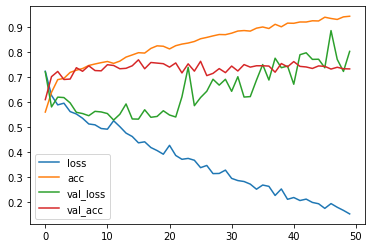

In [12]:
history_df = pd.DataFrame(history.history)
print(history_df)
history_df.plot()
plt.show()

In [13]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import shutil
from tensorflow.keras.applications.efficientnet import preprocess_input

In [14]:
def testing(path):
    files = os.listdir(path)
    df = pd.DataFrame(columns=['patient_id','number_of_images' ,'actual_diagnosis','prediction_negative_array','prediction_positive_array','predicted_diagnosis'])
    for f1 in files:
        file_p_n = os.listdir(path+'/'+f1)
        for f2 in file_p_n:
            p_n_str = f2.split('_')[1]
            img_files = os.listdir(path+'/'+f1+'/'+f2)
            n_imgs = len(img_files)
            pos_array = []
            neg_array = []
            for f3 in img_files:
                img = image.load_img(path+'/'+f1+'/'+f2+'/'+f3,target_size=(256,256))
                img = image.img_to_array(img)
                img = preprocess_input(img)
                img = np.expand_dims(img, axis = 0)
                prediction = model.predict(img)
#                 print(prediction)
                pos_array.append(prediction[0][1])
                neg_array.append(prediction[0][0])
            final_n = np.mean(neg_array)
            final_p = np.mean(pos_array)
            if final_p >= final_n:
                result = 'positive'
            else:
                result = 'negative'
            df = df.append({'patient_id':f1,'number_of_images':n_imgs,'actual_diagnosis':p_n_str,'prediction_negative_array':neg_array,'prediction_positive_array':pos_array,'predicted_diagnosis':result},ignore_index=True)
    return df

In [15]:
shoulder_testing = testing("C:/Users/patel/Desktop/Mini_Project/MURA-v1.1/MURA-v1.1/valid/XR_SHOULDER")

In [19]:
shoulder_testing.to_csv('testing_analysis.csv')

In [16]:
# df1 = pd.read_csv('elbow_eff_83.csv')
df1 = shoulder_testing
cnt = 0
for i in range(158):
    if df1.iloc[i]["actual_diagnosis"] == df1.iloc[i]['predicted_diagnosis']:
        cnt+=1

print("Accuracy :",(cnt/158)*100)

Accuracy : 75.31645569620254


In [17]:
tp, tn, fp, fn = 0, 0, 0, 0

for i in range(153):
    if (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        tp += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "positive") and  (df1.iloc[i]['predicted_diagnosis']=="negative"):
        fn += 1
    elif (df1.iloc[i]["actual_diagnosis"] == "negative") and  (df1.iloc[i]['predicted_diagnosis']=="positive"):
        fp += 1
    else:
        tn +=1

In [18]:
print("True Positive :", tp)
print("True Negative :", tn)
print("False Positive :", fp)
print("False Negative :", fn)


True Positive : 80
True Negative : 37
False Positive : 21
False Negative : 15
